In [4]:
import pandas as pd

df = pd.read_csv('Global_Superstore.csv', encoding='ISO-8859-1')
print(df.shape)
print(df.head())


(51290, 24)
   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033 

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())


In [7]:
# mark returns/refunds
if 'Quantity' in df.columns:
    df['Return_Flag'] = df['Quantity'] < 0

# profit margin
if set(['Sales','Profit']).issubset(df.columns):
    df['Profit_Margin'] = df['Profit'] / df['Sales'].replace({0: pd.NA})


In [8]:
# time features
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Week'] = df['Order Date'].dt.isocalendar().week
df['Order_DayOfWeek'] = df['Order Date'].dt.day_name()

# shipping days
df['Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# unit price
df['Unit_Price'] = df['Sales'] / df['Quantity'].replace({0:1})

# revenue per order
order_rev = df.groupby('Order ID')['Sales'].sum().reset_index().rename(columns={'Sales':'Order_Sales'})
df = df.merge(order_rev, on='Order ID', how='left')


In [9]:
def cap_iqr(series):
    Q1 = series.quantile(0.25); Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR; high = Q3 + 1.5 * IQR
    return series.clip(lower=low, upper=high)

for col in ['Sales','Profit','Unit_Price','Ship_Days']:
    if col in df.columns:
        df[col+'_cap'] = cap_iqr(df[col])


In [13]:
monthly = df.set_index('Order Date').resample('ME')['Sales'].sum()


In [14]:
monthly = df.set_index('Order Date').resample('MS')['Sales'].sum()


In [15]:
import matplotlib.pyplot as plt


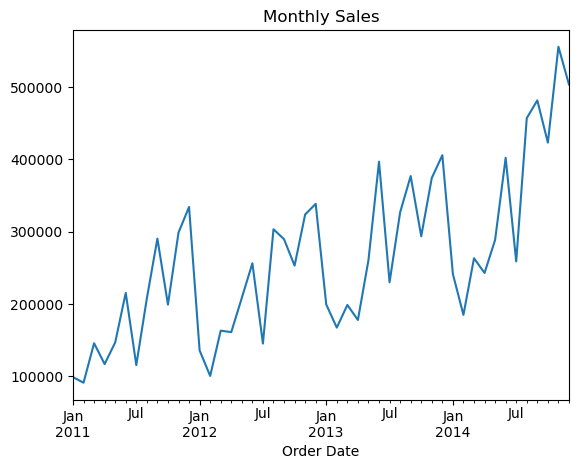

In [17]:
import os
import matplotlib.pyplot as plt

# create folder if it doesn't exist
os.makedirs('figures', exist_ok=True)

monthly = df.set_index('Order Date').resample('ME')['Sales'].sum()
monthly.plot(title='Monthly Sales')

plt.savefig('figures/monthly_sales.png')
plt.show()


In [18]:
import pandas as pd

df = pd.read_csv('Global_Superstore.csv', encoding='ISO-8859-1')
date_cols = ['Order Date', 'Ship Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)


In [19]:
df.drop_duplicates(inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())


In [20]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Week'] = df['Order Date'].dt.isocalendar().week
df['Order_Day'] = df['Order Date'].dt.day_name()

df['Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Unit_Price'] = df['Sales'] / df['Quantity']
df['Profit_Margin'] = df['Profit'] / df['Sales']


In [21]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.makedirs('figures', exist_ok=True)

# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales.plot(kind='bar', title='Sales by Region')
plt.savefig('figures/sales_by_region.png')
plt.close()


In [23]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)


RMSE: 415.54416142743946


In [24]:
df.to_csv('cleaned_data.csv', index=False)


In [25]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values()
category_sales.plot(kind='bar', title='Sales by Category', color='skyblue')
plt.ylabel('Sales')
plt.savefig('figures/sales_by_category.png')
plt.close()


In [26]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values()
subcat_sales.plot(kind='barh', title='Sales by Sub-Category', color='orange')
plt.xlabel('Sales')
plt.savefig('figures/sales_by_subcategory.png')
plt.close()


In [27]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Sales', color='green')
plt.ylabel('Sales')
plt.savefig('figures/top_10_products.png')
plt.close()


In [28]:
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title('Profit vs Discount')
plt.savefig('figures/profit_vs_discount.png')
plt.close()


In [29]:
corr = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('figures/correlation_heatmap.png')
plt.close()


In [30]:
sns.boxplot(x='Sub-Category', y='Profit', data=df)
plt.xticks(rotation=90)
plt.title('Profit by Sub-Category')
plt.savefig('figures/profit_by_subcategory.png')
plt.close()
